<a href="https://colab.research.google.com/github/LucasMonteiroBastos/REGRESSAO_PLANO_DE_SAUDE/blob/main/REGRESS%C3%83O_PLANO_DE_SA%C3%9ADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objetivo: Construir um modelo de Regressão Linear para fazermos a previsão de quanto irá custar o plano de saúde para uma pessoa, dependendo da idade do individuo.

BIBLIOTECAS


In [1]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

LENDO A BASE

In [2]:
base_plano_saude = pd.read_csv('/content/plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


CRIANDO VARIAVEIS

In [3]:
# x - atributo previsor
X_plano_saude = base_plano_saude.iloc[:,0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [4]:
# y - custo do plano de saúde
y_plano_saude = base_plano_saude.iloc[:,1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

COEFICIENTE DE CORRELAÇAO

In [5]:
np.corrcoef(X_plano_saude,y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

FORMATO DAS VARIAVEIS

In [6]:
X_plano_saude.shape # matrix, uma dimensão somente, obs: precisamos colocar em duas dimensoes

(10,)

In [7]:
 # transformando em matrix
 X_plano_saude = X_plano_saude.reshape(-1,1)
 X_plano_saude.shape


(10, 1)

REGRESSÃO LINEAR

In [8]:
from sklearn.linear_model import LinearRegression
regressao_plano_saude = LinearRegression()

FAZENDO O TREINAMENTO

In [9]:
regressao_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [10]:
# b0
regressao_plano_saude.intercept_

-558.9490909090912

In [11]:
# b1
regressao_plano_saude.coef_

array([61.86787879])

PREVISOES

In [12]:
previsoes = regressao_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

GRAFICO PARA MOSTRAR AS PREVISOES

In [13]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [14]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'Regressao')
grafico.show()

SCORE

In [15]:
regressao_plano_saude.score(X_plano_saude, y_plano_saude) # quanto mais proximo de 1, melhor o valor

0.8666112727879174

 RESIDUALS
 

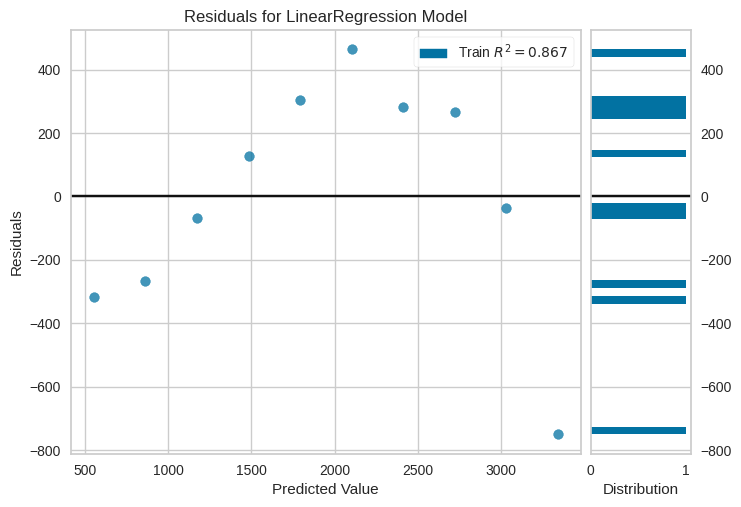

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressao_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()

BASE DE DADOS PLANO DE SAÚDE: REGRESSÃO POLINOMIAL


In [17]:
base_plano_saude2 = pd.read_csv('/content/plano_saude2.csv')
base_plano_saude2

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


DEFININDO AS VARIAVEIS PREVISOES E CLASSE (X & Y)

In [18]:
X_plano_saude2 = base_plano_saude2.iloc[:,0:1].values

y_plano_saude2 = base_plano_saude2.iloc[:, 1].values

In [19]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [20]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

APLICAÇÃO DA REGRESSÃO POLINOMIAL

In [21]:
  from sklearn.preprocessing import PolynomialFeatures
  poly = PolynomialFeatures(degree=2)
  X_plano_saude2_poly = poly.fit_transform(X_plano_saude2)

IMPLEMENTANDO O MODELO DE REGRESSÃO LINEAR

In [22]:
regressor_saude_polinomial = LinearRegression()
regressor_saude_polinomial.fit(X_plano_saude2_poly, y_plano_saude2) 

LinearRegression()

In [23]:
# b0
regressor_saude_polinomial.intercept_

7133.836363636174

In [24]:
# b1 (n)
regressor_saude_polinomial.coef_

array([   0.        , -469.89393939,    7.82121212])

PREVISOES

In [25]:
previsoes = regressor_saude_polinomial.predict(X_plano_saude2_poly)
previsoes

array([1209.81818182,  463.6969697 ,  108.63636364,  144.63636364,
        571.6969697 , 1389.81818182, 2599.        , 4199.24242424,
       6190.54545455, 8572.90909091])

GRAFICO

In [26]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:,0], y = previsoes, name='Regressao')
grafico.show()

ÁRVORE DE DECISÃO

In [27]:
# implementando a árvore de decisão
from sklearn.tree import DecisionTreeClassifier
regressor_arvore_saude = DecisionTreeClassifier()
regressor_arvore_saude.fit(X_plano_saude2, y_plano_saude2)

DecisionTreeClassifier()

PREVISOES

In [28]:
previsoes = regressor_arvore_saude.predict(X_plano_saude2)
previsoes

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

SCORE

In [29]:
regressor_arvore_saude.score(X_plano_saude2, y_plano_saude2)

1.0

GRAFICO

In [30]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

VISUALIZANDO A IDADE MIN/MAX

In [31]:
X_teste_arvore = np.arange(min(X_plano_saude2), max(X_plano_saude2), 0.1)
X_teste_arvore

array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [32]:
X_teste_arvore = X_teste_arvore.reshape(-1,1)
X_teste_arvore.shape

(450, 1)

In [33]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_arvore_saude.predict(X_teste_arvore), name = 'Regressão')
grafico.show()

RANDOM FOREST

In [34]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [35]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

IMPLEMENTANDO O ALGORITMO RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest_saude = RandomForestRegressor(n_estimators=10)
regressor_random_forest_saude.fit(X_plano_saude2, y_plano_saude2)

RandomForestRegressor(n_estimators=10)

SCORE

In [38]:
regressor_random_forest_saude.score(X_plano_saude2, y_plano_saude2)

0.8479648762908876

In [39]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_random_forest_saude.predict(X_teste_arvore), name = 'Regressão')
grafico.show()

TESTE DE PREVISÃO

In [40]:
regressor_random_forest_saude.predict([[40]])

array([1124.])